In [1]:
import pandas as pd
import censusdata
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sb

%matplotlib inline
%config InlineBackend.figure_format ='retina'

sharedFolder = '/work/group/egodat/reu23_clark/'
dataFolder = sharedFolder + 'data/'

#Load states shapefile (for plotting) (https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html under States)

statesShp = gpd.read_file(dataFolder + "/cb_2018_us_state_500k.zip").to_crs(3857)
statesShp = statesShp[['GEOID', 'STUSPS', 'NAME', 'geometry']]

def plotUS():
    ax = statesShp.plot(figsize=(20, 10))
    ax.axis('equal')
    plt.xlim(-1.5e7, -0.7e7)
    plt.ylim(2.5e6, 7e6)
    return ax

In [2]:
df10 = pd.read_pickle(dataFolder + "combined2010.pkl")
df15 = pd.read_pickle(dataFolder + "combined2015.pkl")
df19 = pd.read_pickle(dataFolder + "combined2019.pkl")
df20 = pd.read_pickle(dataFolder + "combined2020.pkl")
df21 = pd.read_pickle(dataFolder + "combined2021.pkl")

In [3]:
liminal = df19['liminal']
metro = df19['metro']
micro = df19['micro']
notLim = df19['micro'] & ~liminal

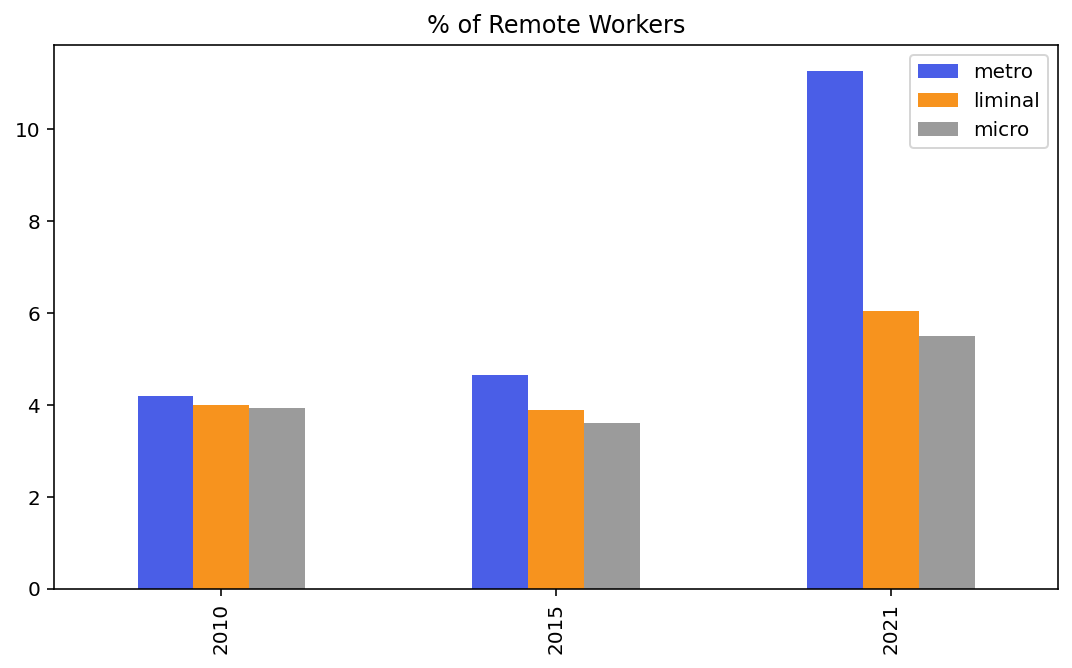

In [4]:
df = pd.DataFrame()
df.loc[2010, 'metro'] = df10[metro]['Num_Worked_Home'].sum() / df10[metro]['Num_Workers'].sum() * 100
df.loc[2010, 'liminal'] = df10[liminal]['Num_Worked_Home'].sum() / df10[liminal]['Num_Workers'].sum() * 100
df.loc[2010, 'micro'] = df10[notLim]['Num_Worked_Home'].sum() / df10[notLim]['Num_Workers'].sum() * 100
df.loc[2015, 'metro'] = df15[metro]['Num_Worked_Home'].sum() / df15[metro]['Num_Workers'].sum() * 100
df.loc[2015, 'liminal'] = df15[liminal]['Num_Worked_Home'].sum() / df15[liminal]['Num_Workers'].sum() * 100
df.loc[2015, 'micro'] = df15[notLim]['Num_Worked_Home'].sum() / df15[notLim]['Num_Workers'].sum() * 100
df.loc[2021, 'metro'] = df21[metro]['Num_Worked_Home'].sum() / df21[metro]['Num_Workers'].sum() * 100
df.loc[2021, 'liminal'] = df21[liminal]['Num_Worked_Home'].sum() / df21[liminal]['Num_Workers'].sum() * 100
df.loc[2021, 'micro'] = df21[notLim]['Num_Worked_Home'].sum() / df21[notLim]['Num_Workers'].sum() * 100
df.plot(kind='bar', color=['#4a5ee7', '#f7931e', '#9b9b9b'], figsize=(9, 5))
plt.title("% of Remote Workers");

In [5]:
statesShp = gpd.read_file(dataFolder + "/cb_2018_us_state_500k.zip").to_crs(3857)
statesShp = statesShp[['GEOID', 'STUSPS', 'NAME', 'geometry']]

def plotUS():
    ax = statesShp.plot(figsize=(20, 10))
    ax.axis('equal')
    plt.xlim(-1.5e7, -0.7e7)
    plt.ylim(2.5e6, 7e6)
    return ax

In [6]:
df21['Remote_Pct'] = df21['Num_Worked_Home'] / df21['Num_Workers'] * 100

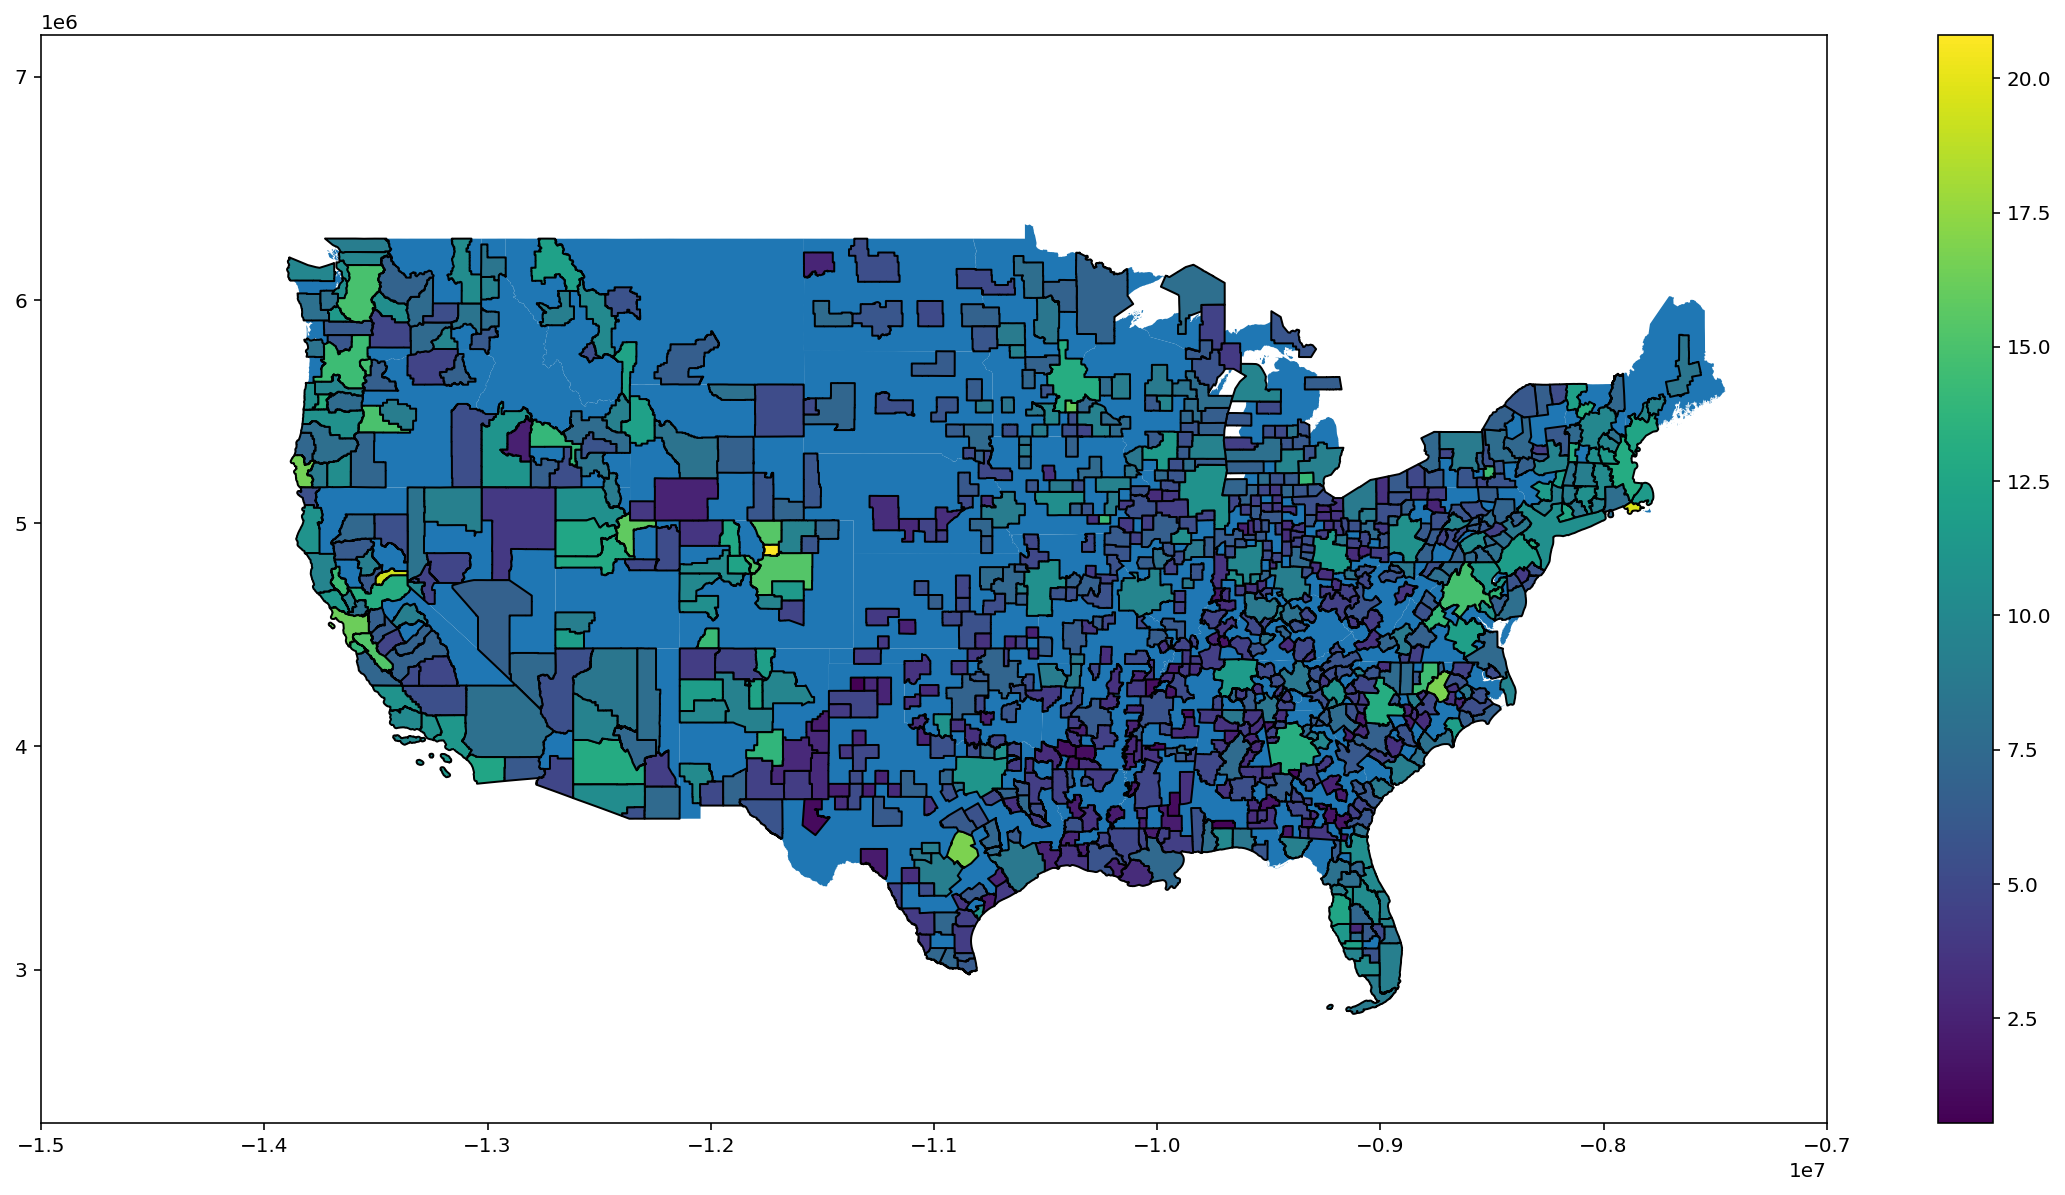

In [7]:
ax = plotUS()
df21.plot(ax=ax, column="Remote_Pct", edgecolor="black", linewidth=1, legend=True);

In [8]:
df21[['NAME', 'Remote_Pct', 'Num_Workers']].sort_values(by='Remote_Pct')

,NAME,Remote_Pct,Num_Workers
195,"Dumas, TX",0.560024,9821
3,"Atmore, AL",0.747267,12713
360,"Grenada, MS",0.966690,8586
664,"Pecos, TX",1.075939,6413
476,"Laurel, MS",1.129843,33633
...,...,...,...
10,"Austin-Round Rock-Georgetown, TX",16.766874,1190031
706,"Raleigh-Cary, NC",16.830188,709796
856,"Truckee-Grass Valley, CA",19.264437,45924
882,"Vineyard Haven, MA",19.618038,10001
